In [1]:
%load_ext autoreload
%autoreload 2

### test QE analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvcircuit as pvc
import ipywidgets as widgets
%matplotlib widget

Tandems version 0.989
Data path is:  /Users/jgeisz/opt/anaconda3/envs/pvdev/lib/python3.9/site-packages/tandems/data/


In [3]:
#import EQE of WB417
path = pvc.datapath
file = 'WB417n6_C_EQE.csv'
df2J = pd.read_csv(path+file, index_col=0)
WB417_EQE = df2J.to_numpy(dtype=np.float64, copy=True) #numpy.ndarray
WB417_xEQE = df2J.index.to_numpy(dtype=np.float64, copy=True) #numpy.ndarray
EQE2J = pvc.EQE(WB417_EQE, WB417_xEQE, 'WB417_EQE')  #EQE class
EQE2J.sjuncs = ['GaInP','GaAs']  #rename junctions

file = 'MM927Bn5CEQE.csv'
df4J  = pd.read_csv(path+file, index_col=0)
MM927_EQE = df4J.to_numpy(dtype=np.float64, copy=True) #numpy.ndarray
MM927_xEQE = df4J.index.to_numpy(dtype=np.float64, copy=True) #numpy.ndarray

EQE4J = pvc.EQE(MM927_EQE, MM927_xEQE, 'MM927_EQE')

#import TMY data of Boulder
Boulder = pvc.TMY(497)

#models of WB417
dev3T = pvc.Tandem3T()
dev3T.set(name='WB417dev3T', Rz = 2.3)
dev3T.top.set(Eg=1.87, J0ratio=[ 80., 22.], Jext=0.0131, Gsh=1e-8)   
dev3T.bot.set(Eg=1.419, J0ratio=[10., 15.], Jext=0.0128, Gsh= 5e-5)
dev3T.bot.set(Rser=0.2, beta=5, area=0.89)
dev2T = pvc.Multi2T.copy3T(dev3T)

In [4]:
EQE2J.Jint('global')

array([[13.109, 12.785]])

In [5]:
EQE2J.Jdb(25)

(array([3.491e-29, 8.700e-22]), array([1.871, 1.419]))

global 1000.4707036093448  W/m2
Eg =  [1.871 1.419]  eV
Jsc =  [[13.109 12.785]]  mA/cm2


(<AxesSubplot:xlabel='Wavelength (nm)', ylabel='EQE'>,
 <AxesSubplot:ylabel='Irradiance (W/m2/nm)'>)

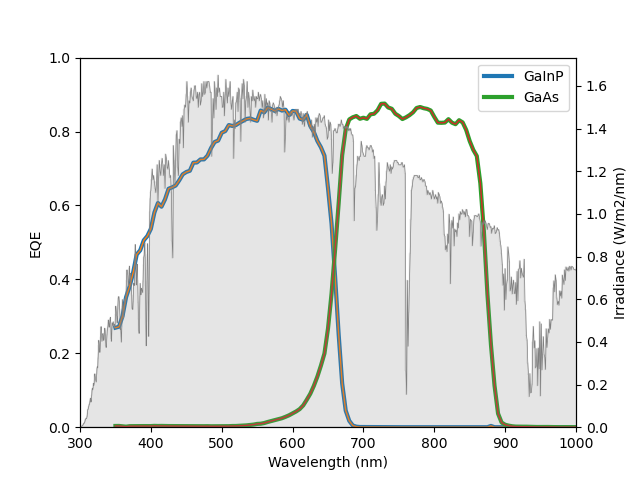

In [6]:
EQE2J.plot()

direct 900.1870983305554  W/m2
Eg =  [1.83  1.41  1.058 0.744]  eV
Jsc =  [[11.615 11.599 11.304 11.02 ]]  mA/cm2


(<AxesSubplot:xlabel='Wavelength (nm)', ylabel='EQE'>,
 <AxesSubplot:ylabel='Irradiance (W/m2/nm)'>)

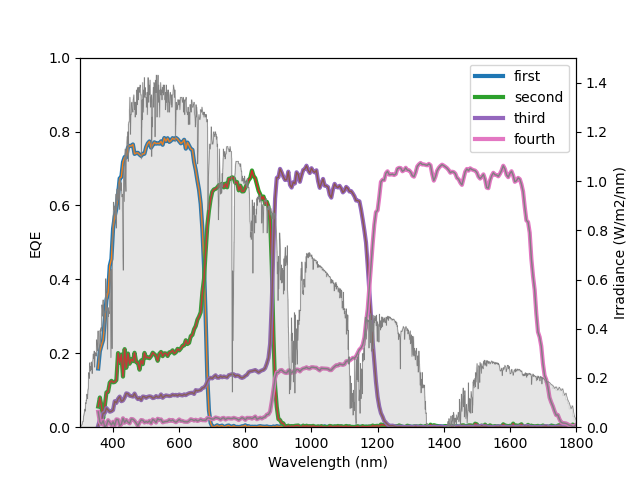

In [7]:
EQE4J.plot('direct')

direct 900.1870983305554  W/m2
Eg =  [1.83  1.403 1.051 0.737]  eV
Jsc =  [[11.615 11.594 11.22  10.935]]  mA/cm2


(<AxesSubplot:xlabel='Wavelength (nm)', ylabel='EQE'>,
 <AxesSubplot:ylabel='Irradiance (W/m2/nm)'>)

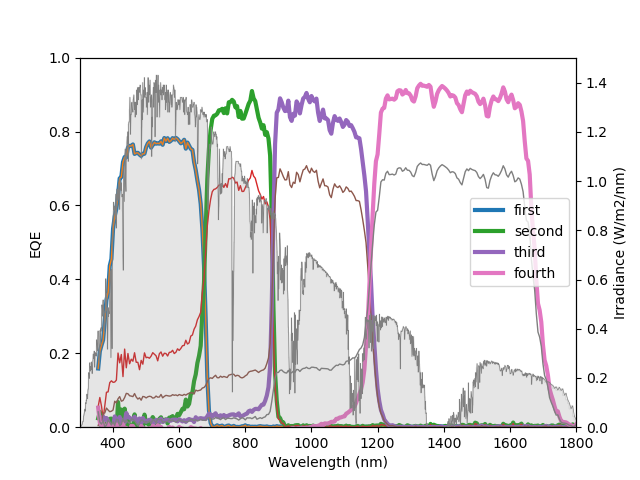

In [8]:
EQE4J.etas=np.array([[0,0,0],[.31,0,0],[.22,.27,0],[.3,0,0]])
EQE4J.LCcorr()
EQE4J.plot('direct')

In [9]:
Boulder = pvc.TMY(497)
Boulder.name

'40.13_-105.22_1616_-7_axis'

In [11]:
Boulder.cellcurrents(EQE2J)
print(Boulder.JscSTCs, Boulder.RefPower, Boulder.YearlyEnergy)

[[0.016 0.014]
 [0.013 0.013]
 [0.011 0.012]] [1348.043 1000.471  900.187] 2082.870057087224


In [24]:
cfglist = ['VM11','VM43','VM32','VM21','VM31','VM41','MPP','CM']
results = []
for cfg in cfglist:
    results.append(list(Boulder.cellpower(dev3T,cfg)))
dev3T.bot.set(pn=-1) #r-type  
for cfg in cfglist:
    results.append(list(Boulder.cellpower(dev3T,cfg)))

In [26]:
dfresults = pd.DataFrame(results)
dfresults.columns = ['ratio','type','EY','EYeff','STCeff']
dfresults

,ratio,type,EY,EYeff,STCeff
0,1.000000,s,434.488511,0.208601,0.219893
1,0.750000,s,513.201260,0.246391,0.258360
2,0.666667,s,521.685389,0.250465,0.260693
3,0.500000,s,481.376420,0.231112,0.238821
4,0.333333,s,433.114920,0.207941,0.213996
5,0.250000,s,408.936033,0.196333,0.201588
6,-0.500000,s,522.665219,0.250935,0.261872
7,0.000000,s,480.406279,0.230646,0.247938
8,1.000000,r,414.443069,0.198977,0.205942
9,0.750000,r,491.734261,0.236085,0.243403
